In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

os.chdir('..')

In [71]:
from src.models import EXIF_Net
import torch
from src.datasets import MIRFLICKR_25kDataModule
import torch.nn.functional as F

In [78]:
img = torch.randn(128, 128)

In [79]:
img[[0, 1, 2], [4, 5, 6]].shape

torch.Size([3])

In [85]:
img[[slice(0, 5), slice(0, 5)], [slice(0, 5), slice(0, 5)]]

RuntimeError: Could not infer dtype of slice

In [7]:
from src.datasets import (
    ColumbiaDataset,
    DSO_1_Dataset,
    InTheWildDataset,
    RealisticTamperingDataset,
    SceneCompletionDataset,
    MIRFLICKR_25kDataset,
)
from src.datasets.utils import (
    compute_sha256, 
    check_and_download_url,
    download_url,
)
import gdown
from pathlib import Path
from PIL import Image

In [8]:
im = Image.open('test/CASIA2.0_revised/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif')

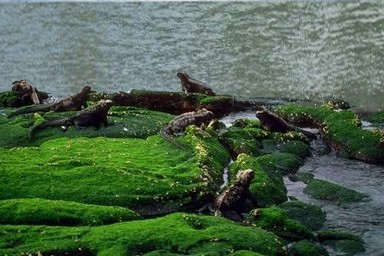

In [10]:
im

In [6]:
check_and_download_url(
    Path('test'), 
    '', 
    'CASIA2.0_revised.zip', 
    'https://drive.google.com/u/0/uc?id=1IDUgcoUeonBxx2rASX-_QwV9fhbtqdY8',
    gdrive=True
)

Downloading...
From: https://drive.google.com/u/0/uc?id=1IDUgcoUeonBxx2rASX-_QwV9fhbtqdY8
To: /home/angyz/code/fake-detection-lab/test/CASIA2.0_revised.zip
2.67GB [00:28, 95.0MB/s]
Computing SHA-256...


ValueError: Downloaded data file SHA-256 (965b49354793d63a170e4db38990d4183e89e0c94acf8c1d361adf48eece9031) does not match that listed in metadata document.

In [29]:
download_url('https://drive.google.com/u/0/uc?id=0B73Fq3C_nT4aOThud0NYWUR2MTQ', '/home/angyz/code/fake-detection-lab/test/realistic-tampering-dataset.zip')

8.00kB [00:00, 23.2kB/s]


In [24]:
gdown.download(
    'https://drive.google.com/u/0/uc?id=0B73Fq3C_nT4aOThud0NYWUR2MTQ',
    '/home/angyz/code/fake-detection-lab/test/realistic-tampering-dataset.zip',
    quiet=False
)

Downloading...
From: https://drive.google.com/u/0/uc?id=0B73Fq3C_nT4aOThud0NYWUR2MTQ
To: /home/angyz/code/fake-detection-lab/test/realistic-tampering-dataset.zip
1.70GB [00:22, 74.8MB/s]


'/home/angyz/code/fake-detection-lab/test/realistic-tampering-dataset.zip'

In [4]:
compute_sha256('/home/angyz/code/fake-detection-lab/mirflickr25k.zip')

'e0d5b222ddd078a9be551c2a2b90e17cb3aa90d0a67f775545f31aad05787881'

In [6]:
ds = MIRFLICKR_25kDataset()

0.00B [00:00, ?B/s]Downloading raw dataset from http://press.liacs.nl/mirflickr/mirflickr25k.v3/mirflickr25k.zip to data/downloaded/mirflickr_25k/mirflickr25k.zip...
2.86GB [05:32, 9.24MB/s]                            
Computing SHA-256...
Unzipping MIRFLICKR-25k...


In [42]:
ds[50]

{'img': tensor([[[247, 248, 248,  ..., 187, 186, 185],
          [248, 248, 248,  ..., 188, 186, 185],
          [247, 247, 248,  ..., 188, 186, 185],
          ...,
          [158, 163, 161,  ..., 155, 153, 156],
          [161, 163, 162,  ..., 141, 149, 156],
          [166, 160, 158,  ..., 133, 153, 157]],
 
         [[247, 248, 248,  ..., 221, 221, 219],
          [248, 248, 248,  ..., 221, 222, 220],
          [247, 247, 248,  ..., 222, 221, 219],
          ...,
          [156, 162, 162,  ..., 151, 149, 149],
          [161, 161, 162,  ..., 137, 145, 148],
          [166, 159, 156,  ..., 128, 147, 147]],
 
         [[249, 248, 248,  ..., 255, 255, 255],
          [250, 248, 248,  ..., 255, 255, 255],
          [249, 247, 248,  ..., 255, 255, 255],
          ...,
          [157, 156, 152,  ..., 107, 103, 106],
          [163, 160, 158,  ...,  95, 101, 109],
          [166, 160, 157,  ...,  89, 106, 112]]], dtype=torch.uint8),
 'label': 1,
 'map': array([[0, 0, 0, ..., 0, 0, 0],
   

In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
from src.models.exif_sc import EXIF_SC
import torch
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from src.datasets import (
    RealisticTamperingDataset,
    ColumbiaDataset,
    InTheWildDataset,
    SceneCompletionDataset
)
import random
from src.structures import PatchedImage

In [5]:
model = EXIF_SC("artifacts/exif_sc.npy", device="cuda:0")

In [13]:
ds = InTheWildDataset()
# idx = random.randint(0, len(ds)-1)
idx = 91
data = ds[idx]
img = data['img']
gt_map = data['map']

In [17]:
img = PatchedImage(img, 128, 30)

In [44]:
for batch in img.patch_maps_gen():
    maps = batch
    break

In [45]:
maps.shape

torch.Size([32, 713, 713])

In [46]:
gt_map.shape

(713, 713)

In [22]:
maps.dtype, gt_map.dtype

(torch.uint8, dtype('uint8'))

In [47]:
gt_map.mean()

0.3483335923315544

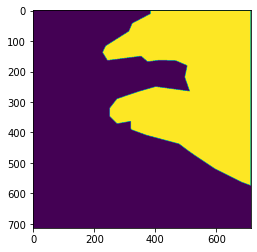

In [48]:
plt.imshow(gt_map)

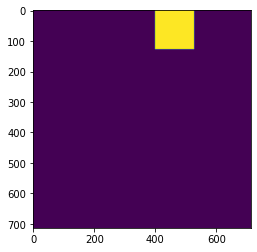

In [51]:
plt.imshow(maps[21])

In [6]:
shapes = []
for i in range(len(ds)):
    data = ds[i]
    shapes.append(list(data['img'].shape))

In [7]:
np.array(shapes)[:,1].mean()

1077.0298507462687

In [8]:
np.array(shapes)[:,2].mean()

1435.6119402985075

In [73]:
data['label']

1

In [74]:
img.shape

torch.Size([3, 533, 800])

In [75]:
# img_cv = cv2.imread("data/demo.png")[:, :, [2, 1, 0]]  # [H, W, C]
# img = torch.from_numpy(img_cv).permute(2, 0, 1)  # [C, H, W]

In [12]:
model.max_h_idx, model.max_w_idx

(31, 31)

In [13]:
(31 * 31) % 32

1

In [22]:
start = time.time()
pred = model.predict(img)
end = time.time()
print(end - start)

69.14436888694763


In [77]:
pred['ms'].min(), pred['ms'].max()

(0.0017701387, 0.40574574)

In [78]:
pred['score'].mean()

0.08683856

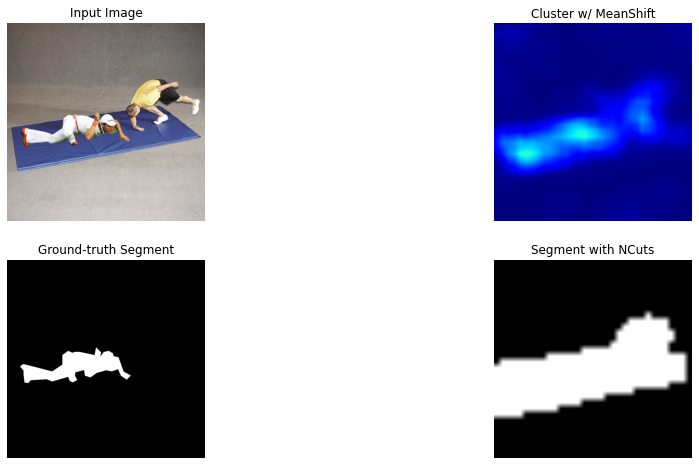

In [23]:
img_cv = img.permute(1, 2, 0)

plt.subplots(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.title('Input Image')
plt.imshow(img_cv)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(pred['ms'], cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(2, 2, 3)
plt.title('Ground-truth Segment')
plt.axis('off')
plt.imshow(data['map'], vmin=0.0, vmax=1.0, cmap="gray")

plt.subplot(2, 2, 4)
plt.title('Segment with NCuts')
plt.axis('off')
plt.imshow(pred['ncuts'], vmin=0.0, vmax=1.0, cmap="gray")

plt.show()

# ANALYZE

In [6]:
model._init_img(img)

In [7]:
model.max_h_idx, model.max_w_idx

(31, 22)

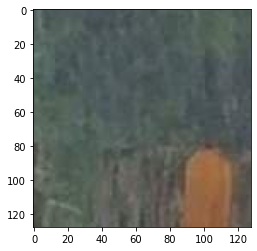

In [43]:
patch = model._get_patch(1, 9)
# patch = model.img
patch = patch.cpu().permute(1, 2, 0).numpy()

patch = (patch + 1) /2

# patch = patch.astype(int)
plt.imshow(patch)

In [39]:
patch_b = model._get_patch(16, 4)
# patch_b = model._get_patch(16, 4)
patches = next(model._patches_gen(682))

In [44]:
patch_b

tensor([[[-0.5608, -0.5216, -0.3176,  ..., -0.4275, -0.3647, -0.4118],
         [-0.5373, -0.5059, -0.3569,  ..., -0.4588, -0.4118, -0.4588],
         [-0.5137, -0.4745, -0.3647,  ..., -0.5059, -0.4824, -0.4745],
         ...,
         [ 0.2549,  0.3490,  0.3725,  ..., -0.4980, -0.5451, -0.4353],
         [ 0.1686,  0.3333,  0.3647,  ..., -0.5137, -0.6392, -0.5529],
         [ 0.0824,  0.2941,  0.3569,  ..., -0.5137, -0.6627, -0.6000]],

        [[-0.5294, -0.4431, -0.2078,  ..., -0.2863, -0.2235, -0.2706],
         [-0.5137, -0.4275, -0.2392,  ..., -0.3098, -0.2627, -0.3098],
         [-0.4745, -0.3882, -0.2471,  ..., -0.3333, -0.3098, -0.3255],
         ...,
         [-0.0824,  0.0118, -0.0039,  ..., -0.1765, -0.2235, -0.1137],
         [-0.1686,  0.0039,  0.0196,  ..., -0.2157, -0.3412, -0.2549],
         [-0.2471, -0.0118,  0.0275,  ..., -0.2314, -0.3804, -0.3020]],

        [[-0.6392, -0.5137, -0.1843,  ..., -0.1922, -0.1294, -0.1608],
         [-0.6000, -0.4902, -0.2157,  ..., -0

In [48]:
patch_b.min(), patch_b.max()

(tensor(-1., device='cuda:1'), tensor(1., device='cuda:1'))

In [46]:
patch_a.min(), patch_a.max()

(tensor(-0.4118, device='cuda:1'), tensor(0.3176, device='cuda:1'))

In [27]:
with torch.no_grad():
    pred = model.net.predict(patch_a, patch_b)
pred

tensor([0.9998], device='cuda:1')

In [40]:
preds = torch.zeros(682)

for i, patch_a in enumerate(patches):
    with torch.no_grad():
        preds[i] = model.net.predict(patch_a, patch_b)

In [41]:
preds.min(), preds.max()

(tensor(0.), tensor(0.))

# EVALUATION

In [28]:
import numpy as np
from src.datasets import RealisticTamperingDataset
from sklearn.metrics import average_precision_score
from pathlib import Path
from src.evaluators import Evaluator

In [23]:
save_path = Path("artifacts/predictions")
ds = ColumbiaDataset()

In [24]:
scores = np.load(save_path / "scores.npy")
score_maps = np.load(save_path / "score_maps.npy")
# ncuts = np.load(save_path / "rt_ncuts.npy")

In [26]:
score_maps.shape

(363, 768, 1152)

In [27]:
resize = (768, 1152)
labels = []
label_maps = []

for i in range(len(ds)):
    data = ds[i]
    data["map"] = cv2.resize(
        data["map"], resize, interpolation=cv2.INTER_LINEAR
    )
    labels.append(data['label'])
    label_maps.append(data['map'])

labels = np.array(labels)
label_maps = np.stack(label_maps, axis=0)

In [29]:
evaluator = Evaluator(model, ds)

In [33]:
metrics = evaluator._compute_localization_metrics(label_maps, score_maps)

In [34]:
evaluator.metrics

{'IoU-spliced': 0.17097105085849762,
 'IoU-non-spliced': 0.9050241112709045,
 'IoU': 0.5379975810647011}